## Первичное знакомство с данными

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# отключим некритические предупреждения в коде
import warnings
warnings.filterwarnings("ignore")

# сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
#зададим константу 
RANDOM_STATE = 12345

### Импорт данных

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325623 entries, 0 to 325622
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   whs                     325623 non-null  int64  
 1   orderkey                325623 non-null  object 
 2   selected_cartontype     325623 non-null  object 
 3   box_num                 325623 non-null  int64  
 4   recommended_cartontype  325623 non-null  object 
 5   selected_carton         325623 non-null  object 
 6   sel_calc_cube           325623 non-null  int64  
 7   recommended_carton      325623 non-null  object 
 8   pack_volume             325623 non-null  int64  
 9   rec_calc_cube           325623 non-null  int64  
 10  goods_wght              325623 non-null  float64
 11  sku                     325623 non-null  object 
 12  who                     325623 non-null  object 
 13  trackingid              325623 non-null  object 
dtypes: float64(1), int64

In [3]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
whs,325623.0,NaN,NaN,NaN,1.366166,2.098641,0.0,0.0,0.0,3.0,7.0
orderkey,325623,159899,c6f08cf222f425f397a9f1beaac0e485,4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selected_cartontype,325623,17,MYB,55937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
box_num,325623.0,NaN,NaN,NaN,2.787773,15.774209,1.0,1.0,1.0,1.0,235.0
recommended_cartontype,325623,22,YMA,49228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selected_carton,325623,17,MYB,55937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sel_calc_cube,325623.0,NaN,NaN,NaN,11188.402656,13958.516542,0.0,3449.0,8436.0,15579.0,108000.0
recommended_carton,325623,22,YMA,49228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pack_volume,325623.0,NaN,NaN,NaN,5440.789656,28581.901292,0.0,500.0,1192.0,3154.0,1815450.0
rec_calc_cube,325623.0,NaN,NaN,NaN,18253.646168,26745.365119,0.0,3449.0,8525.0,18270.0,108000.0


In [4]:
%%time
sku = pd.read_csv('sku.csv', index_col=0)
sku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385961 entries, 0 to 6385960
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   sku     object 
 1   a       float64
 2   b       float64
 3   c       float64
dtypes: float64(3), object(1)
memory usage: 243.6+ MB
Wall time: 5.55 s


In [5]:
%%time
sku_cargotypes = pd.read_csv('sku_cargotypes.csv', index_col = 0)
sku_cargotypes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21053152 entries, 0 to 21053151
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   sku        object
 1   cargotype  int64 
dtypes: int64(1), object(1)
memory usage: 481.9+ MB
Wall time: 10.4 s


In [6]:
sku_cargotypes.head(10)

,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290
5,24ce9dba9f301ada55f60e25ee1498d2,441
6,24ce9dba9f301ada55f60e25ee1498d2,490
7,54a4f25859c817c131b7ec620d1ff278,290
8,54a4f25859c817c131b7ec620d1ff278,441
9,54a4f25859c817c131b7ec620d1ff278,490


In [7]:
%%time
cargotype_info = pd.read_csv('cargotype_info.csv', index_col = 0)
cargotype_info.head()

Wall time: 4.01 ms


,cargotype,description
0,770.0,консервы
1,301.0,тяжеловесный и крупногабаритный 20кг
2,980.0,Требует обязательной маркировки
3,985.0,"Не требует наличия маркировки, но требует выво..."
4,990.0,Потребует обязательной маркировки в ближайшем ...


In [8]:
%%time
carton = pd.read_csv('carton.csv')
carton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CARTONTYPE     29 non-null     object 
 1   LENGTH         29 non-null     float64
 2   WIDTH          29 non-null     float64
 3   HEIGHT         29 non-null     float64
 4   DISPLAYRFPACK  29 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
Wall time: 9.99 ms


In [9]:
%%time
carton_price = pd.read_csv('carton_price.csv', decimal=',')
carton_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carton  15 non-null     object 
 1   price   15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes
Wall time: 15 ms


Информация по заказам и товарам (sku), которые в них содержатся

- whs - код сортировочного центра;
- orderkey - id заказа;
- selected_cartontype - код упаковки, которая была выбрана пользователем;
- box_num - количество коробок;
- recommended_cartontype - код упаковки, рекомендованной алгоритмом;
- selected_carton - код упаковки, которая была выбрана пользователем (дубль);
- sel_calc_cube - объём выбранной упаковки;
- recommended_carton - код упаковки, рекомендованной алгоритмом (дубль);
- pack_volume - рассчитанный объём упакованных товаров;
- rec_calc_cube - объем рекомендуемой упаковки;
- goods_wght - вес товара;
- sku - id товара;
- who - упаковщик;
- trackingid - id доставки;

In [10]:
data.head(20)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
5,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
6,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
7,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
8,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
9,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24


In [11]:
data.query('orderkey =="019902864522eae8aeec192b9e8e1803"')['trackingid'].nunique()

1

### EDA

проверка что дублирующие колонки полностью идентичны.

In [12]:
data[data['selected_cartontype'] != data['selected_carton']]['orderkey'].count()

0

In [13]:
data[data['recommended_cartontype'] != data['recommended_carton']]['orderkey'].count()

0

Уберем дубли колонок

In [14]:
data = data.drop(['recommended_carton', 'selected_carton'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325623 entries, 0 to 325622
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   whs                     325623 non-null  int64  
 1   orderkey                325623 non-null  object 
 2   selected_cartontype     325623 non-null  object 
 3   box_num                 325623 non-null  int64  
 4   recommended_cartontype  325623 non-null  object 
 5   sel_calc_cube           325623 non-null  int64  
 6   pack_volume             325623 non-null  int64  
 7   rec_calc_cube           325623 non-null  int64  
 8   goods_wght              325623 non-null  float64
 9   sku                     325623 non-null  object 
 10  who                     325623 non-null  object 
 11  trackingid              325623 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 32.3+ MB


добавим к основным данным размер товара

In [15]:
full_data = data.merge(sku, on='sku', how='left')
print(full_data.info())
full_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325623 entries, 0 to 325622
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   whs                     325623 non-null  int64  
 1   orderkey                325623 non-null  object 
 2   selected_cartontype     325623 non-null  object 
 3   box_num                 325623 non-null  int64  
 4   recommended_cartontype  325623 non-null  object 
 5   sel_calc_cube           325623 non-null  int64  
 6   pack_volume             325623 non-null  int64  
 7   rec_calc_cube           325623 non-null  int64  
 8   goods_wght              325623 non-null  float64
 9   sku                     325623 non-null  object 
 10  who                     325623 non-null  object 
 11  trackingid              325623 non-null  object 
 12  a                       314830 non-null  float64
 13  b                       314830 non-null  float64
 14  c                   

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c
318336,7,6641c5537dc306b50bc9828372737ac5,NONPACK,3,NONPACK,0,61540,0,40.640,1c229b09d70e0dbdb07d29f6d5079b58,d3578e4b2ab19359f3b2f4b7722922f4,f379ff7dd9a118e1195722a92d166284,NaN,NaN,NaN
303797,6,a7cbbedeb2daaf7788aaa3bd41951fc8,YMA,1,YMC,3360,1690,8525,0.500,dd4f6c6daa140175cf2996c8c2acc0f6,d0fb94f688fa4d9ce1c059e605fccc24,809ea9890aedebf34c83f551ea038d1d,13.0,10.0,13.0
28385,0,cdb13d1360b60441d26061a434b58f2d,NONPACK,2,YME,0,7931,40050,0.726,2491a46228ec4360a28208735b6355c2,ee8a7d79d7e0173e0e429d40b4c5182e,1174aa932061cff3d5ac3b494a7e6e41,13.4,15.1,39.2
160209,0,4204af0cf864a80001f4a76a61ace5b1,MYB,1,MYC,3449,714,8436,0.240,6ef698c95aadb295875c5c875f5cf10a,0fe9082f625ea5f88f656b28ad322cdf,a5103a66e214abf6a12e6a081da85829,7.0,6.0,17.0
2226,0,afaf64f71ce22c32432606364e1796b0,YMC,1,YMA,9000,1454,3705,0.472,8c1e1fa181128da3dd3702b56636ac99,851ec0293a18c641e76acc22abed8d3f,5a414d71a2cd1602bf4432e34f403b82,13.4,6.1,17.8


In [16]:
full_data.head(20)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
5,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
6,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
7,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
8,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
9,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0


In [17]:
carton_price_selected = carton_price.rename(columns = {'carton' : 'selected_cartontype',
                                                'price' : 'selected_carton_price'
                                              })
carton_price_recommended = carton_price.rename(columns = {'carton' : 'recommended_cartontype',
                                                'price' : 'recommended_carton_price'
                                              })

In [18]:
%%time
full_data = full_data.merge(carton_price_selected, on='selected_cartontype', how='left')
full_data = full_data.merge(carton_price_recommended, on='recommended_cartontype', how='left')
full_data.sample(5)

Wall time: 378 ms


,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price
56995,0,a39334ac41d9e4a07ec9ab7658e43458,MYB,1,MYA,3449,150,998,0.020,b69d60836d3e55a713da20dc9fec0cf5,3b03332360fe50db6ce311bbeb983e81,a793ed6841ee293466b79da80a6950d3,1.0,10.0,15.0,2.3,1.1
219806,1,1dbfc733a0a99f2bfcf025e34604787e,YME,1,YMG,40500,269,27000,0.090,11394a79e2067018af5b1e9294a9d003,54030995ec44823396ea433379aa1211,6681a5a63ef75531fb7b33a30ce4be70,5.5,14.0,3.5,23.7,17.5
40621,0,019902864522eae8aeec192b9e8e1803,YMW,1,YMW,18000,112,18000,0.090,d5d47153e9bf22f3255e9ff7988d5347,ca7d25a796baaa135b9b09009b5716d6,ead4ec2e0fabd40a31a99cab25a58e9a,16.0,1.0,7.0,13.9,13.9
116508,0,adc3ee82392548a989ba7a17b7748600,MYB,1,MYF,3449,252,1500,0.230,a75d064ed783eccd1d77efa4cba0c550,9b5fcda829142a12d9f7b7eccbc23cdf,6837cf207d7b3d3b56146fa7aecba3b9,18.0,3.5,4.0,2.3,4.1
33088,0,adaba506eadd2034b555c1570f01d01c,MYC,1,MYC,8436,403,8436,0.139,956ee95c2bf06336a29e099eeb427873,da0ee94de3d7ae04c50fe0b8a569c3d7,482383a4b0ff55f7c9a38081597a98fb,4.8,16.8,5.0,3.6,3.6


In [19]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325623 entries, 0 to 325622
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       325623 non-null  int64  
 1   orderkey                  325623 non-null  object 
 2   selected_cartontype       325623 non-null  object 
 3   box_num                   325623 non-null  int64  
 4   recommended_cartontype    325623 non-null  object 
 5   sel_calc_cube             325623 non-null  int64  
 6   pack_volume               325623 non-null  int64  
 7   rec_calc_cube             325623 non-null  int64  
 8   goods_wght                325623 non-null  float64
 9   sku                       325623 non-null  object 
 10  who                       325623 non-null  object 
 11  trackingid                325623 non-null  object 
 12  a                         314830 non-null  float64
 13  b                         314830 non-null  f

#### нет цены у ymb

In [20]:
np.sort(full_data['selected_cartontype'].unique())

array(['MYA', 'MYB', 'MYC', 'MYD', 'MYE', 'MYF', 'NONPACK', 'STRETCH',
       'YMA', 'YMB', 'YMC', 'YME', 'YMF', 'YMG', 'YML', 'YMW', 'YMX'],
      dtype=object)

In [21]:
np.sort(carton['CARTONTYPE'].unique())

array(['KSD', 'MYA', 'MYB', 'MYC', 'MYD', 'MYE', 'MYF', 'NONPACK',
       'STRETCH', 'YMA', 'YMC', 'YME', 'YMF', 'YMG', 'YMH', 'YMJ', 'YML',
       'YMN', 'YMO', 'YMP', 'YMQ', 'YMR', 'YMS', 'YMU', 'YMV', 'YMW',
       'YMX', 'YMY', 'YMХ'], dtype=object)

In [22]:
np.sort(carton_price['carton'].unique())

array(['MYA', 'MYB', 'MYC', 'MYD', 'MYE', 'MYF', 'YMA', 'YMC', 'YME',
       'YMF', 'YMG', 'YML', 'YMW', 'YMX', 'YMY'], dtype=object)

Нет цены и размеров для типа упаковки 'YMB'. Цену заполним средним арифметическим цены 'YMA' и 'YMC'

In [23]:
full_data[full_data['recommended_cartontype'] == 'YMB']

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price
220700,2,d5f9415b8c8f5145548cc06c26885953,YMF,1,YMB,13500,3456,28800,0.07,1fa2512e91c07d9b3d81b81cfb563aa3,10351499886f2c317d3ab8798faf6828,a9d966d97cbc2f1efbb21329b96557fe,24.0,9.0,16.0,10.7,NaN
220702,2,d5f9415b8c8f5145548cc06c26885953,YMF,1,YMB,13500,11220,28800,0.41,d9983812db1e0475d4250362319df84b,10351499886f2c317d3ab8798faf6828,a9d966d97cbc2f1efbb21329b96557fe,NaN,NaN,NaN,10.7,NaN
220937,2,6aeb7ba0023baabf71854c3aeed9be31,MYD,1,YMB,15579,9000,28800,1.05,52ee0c5857118c13e9d3bf39b7e4afcc,68fb0c1902609efabe9ec2ea3ba32387,40ebdac19311eb660325573bc859d687,30.0,10.0,30.0,6.9,NaN
220968,2,bfedfae8efb53a60372637859380e487,MYD,1,YMB,15579,10850,28800,3.25,62e6fbbc9fd9e3d91173d8e1e3607724,68fb0c1902609efabe9ec2ea3ba32387,ad9a387b70dff3c754e8da8d0dcd5dce,35.0,31.0,10.0,6.9,NaN
221073,2,6f45652c8ba4aa1ecd231a57f6f542a4,MYE,1,YMB,26277,8463,28800,1.89,c7d6907ef653e727fd8540e6c2d7b8e1,484d696437e5f8016c6d98ed76d43485,3eb8a5111d6d016a8e79c0e798a9117a,31.0,13.0,21.0,8.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325269,7,10b6af0502cd7366afaa65a7827aad4e,YML,3,YMB,104586,324,32722,0.09,4ae395575c9f95a02575d4d6d139f8a2,2606564aeffe0f79621bf526b4b964f0,e33c4576021dc1c388998899e7efd715,18.0,1.0,18.0,37.7,NaN
325270,7,10b6af0502cd7366afaa65a7827aad4e,YML,3,YMB,104586,264,32722,0.01,bb3b6b4ca4b66063f9cfe2094343e3fe,2606564aeffe0f79621bf526b4b964f0,e33c4576021dc1c388998899e7efd715,11.0,4.0,6.0,37.7,NaN
325271,7,10b6af0502cd7366afaa65a7827aad4e,YML,3,YMB,104586,250,32722,0.01,6076d1f8fb6371f8bc2eb4c987f0e899,2606564aeffe0f79621bf526b4b964f0,e33c4576021dc1c388998899e7efd715,10.0,5.0,5.0,37.7,NaN
325489,7,53547c3a2a193bf8307b439404696b50,YMG,1,YMB,18270,4256,32722,1.00,c520e3da7d2d8d23e1efb4c372ac4eab,be7c9ad8b9430d358e6c276b94e2beff,5907832a576a8ae441a9efc429f72f3f,38.0,4.0,28.0,17.5,NaN


#### сколько товаров в заказах бывает

In [24]:
items_in_order = full_data.groupby('orderkey').size().reset_index(name='count').sort_values(by='count', ascending=False)
items_in_order

,orderkey,count
124435,c6f08cf222f425f397a9f1beaac0e485,4770
106649,aac30fd1be266afae94a86bd5628a875,526
56276,59ff5833bb533928050f23c8b4ed048c,281
991,019902864522eae8aeec192b9e8e1803,100
123522,c5895f8e1675591ecf7cc5b530a02ae0,95
...,...,...
64729,679b3918d4c52c55d58c0ffa46f035bf,1
64728,679b0ba8569c5fc32decd66a0c9ed20b,1
64727,679aeb9af8dffd0554e899fc5518a43a,1
64726,679acd6307faeb7ec25328bf98498f1d,1


In [25]:
track_in_order = full_data.groupby('orderkey')['trackingid'].nunique().reset_index().sort_values(by='trackingid', ascending=False)
track_in_order.head(20)

,orderkey,trackingid
124435,c6f08cf222f425f397a9f1beaac0e485,235
107368,abdeb87383eae3d971b8e325da219120,27
53660,55e679ce9d303e723c327e868da94e50,21
46869,4af74a7352fc8ef085ea81d65951e4e3,21
156977,fb3f2cc235341e29b329635e8329e6e5,21
78931,7e5bf787762c5bd900fa3ff98c5d3e14,21
120938,c172cce0bb3f5984f0e2777794082ea9,21
58836,5e09ade0642fd2f78d9ad4474ca3df27,19
120314,c06546e8103173d863e06da0593f3a9f,19
47391,4bbc6afa55f18eb0ed83a9cef6faddb6,19


In [26]:
box_in_order = full_data.groupby('orderkey')['box_num'].nunique().reset_index().sort_values(by='box_num', ascending=False)
box_in_order.head(20)

,orderkey,box_num
124435,c6f08cf222f425f397a9f1beaac0e485,235
107368,abdeb87383eae3d971b8e325da219120,27
78931,7e5bf787762c5bd900fa3ff98c5d3e14,21
120938,c172cce0bb3f5984f0e2777794082ea9,21
46869,4af74a7352fc8ef085ea81d65951e4e3,21
53660,55e679ce9d303e723c327e868da94e50,21
156977,fb3f2cc235341e29b329635e8329e6e5,21
58836,5e09ade0642fd2f78d9ad4474ca3df27,19
108599,adc9e2d3f7aede47b35dd07a1c331dd2,19
109339,af0cfed313165474e362c068bca01701,19


In [27]:
who_in_order = full_data.groupby('orderkey')['who'].nunique().reset_index().sort_values(by='who', ascending=False)
who_in_order.head(20)

,orderkey,who
158782,fe28d4246a049f10438b075f2aa97e5a,5
124435,c6f08cf222f425f397a9f1beaac0e485,5
78837,7e36bf68e367208f59e67a63e94219d7,5
105827,a981d50aac9251c83f5d5d7fc14ffc32,4
19067,1e989fbc6cc97b390a492840e8e9a651,4
58836,5e09ade0642fd2f78d9ad4474ca3df27,3
75985,79974c9585ade13f9e94febd2f5c8b5b,3
152034,f34dc3d6f721c15748e4b9f0c1a198d9,3
83168,851a77f6af7838d63d5ec282180b4635,3
74418,770eaaa7153baadb14a2819ef9ed6fc7,3


In [28]:
%%time
in_order = items_in_order.merge(track_in_order, on='orderkey', how='left')
in_order = in_order.merge(box_in_order, on='orderkey', how='left')
in_order = in_order.merge(who_in_order, on='orderkey', how='left')
in_order.head(20)

Wall time: 414 ms


,orderkey,count,trackingid,box_num,who
0,c6f08cf222f425f397a9f1beaac0e485,4770,235,235,5
1,aac30fd1be266afae94a86bd5628a875,526,11,11,2
2,59ff5833bb533928050f23c8b4ed048c,281,9,9,2
3,019902864522eae8aeec192b9e8e1803,100,1,1,1
4,c5895f8e1675591ecf7cc5b530a02ae0,95,1,1,1
5,f1c666073a0d3bebbb9c4274c69e593a,95,15,15,1
6,c8f70ef4ae292b6bcf64b7b61ec51abd,92,2,2,1
7,36e8ab99e9c1b2bb95a335fe5a4e9676,90,1,1,1
8,90827183ad9dea9882f6c2f1098ebb90,88,9,9,1
9,a635280f5238b40f4222adb5806ad550,85,4,4,1


In [29]:
diff_who = in_order.query('trackingid!=box_num')['orderkey']
diff_who

2697     53eff32e8afa716d5770217e53680282
4023     f3e475c16719938dfc49d5a6f271d0e7
7300     6bf150758433a688588f46cd55cfb99a
7406     a19eb1a59de10e631ead8e3260447976
8053     20604560d403df5b6753cb5859fbf775
16593    00c4002326c3a48a920813d56cfeca77
17936    f4438b14cf40747ae193528b5053330c
19180    ceddca4beae8425e09c8bce2cb4500c6
31419    8ae62b06ce9438d9dd9399b9625887b8
33200    9328579a8f3b4f6074c68fde6f677ccb
33263    4c920cda782c387a1a69452ed344df74
34346    a34ce7acdb60c7211694beba7891d0f0
35751    6521f193a346231b64fe510c3d58ccaa
39602    83534207266923b6a74c5d018266cf7b
45774    e9ff73feabbc069965ce6774b854af2d
Name: orderkey, dtype: object

Есть 15 заказов, у которых количество коробок не совпадает с количеством доставок (trackingid)

In [30]:
full_data.query('orderkey=="53eff32e8afa716d5770217e53680282"').sort_values(by='who', ascending=False)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price
179700,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,3720,18000,2.067,dcd4ed253127cef27ab7fa1322317388,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,9.0,32.3,12.8,6.9,13.9
179751,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,715,18000,0.020,0b8bfbd7ee374de0fb8a16d8468706c8,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,5.5,9.1,14.3,6.9,13.9
179833,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,461,18000,0.034,1fa982847f363aec1ca28ad62ebcf02f,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,5.5,7.7,10.9,6.9,13.9
180058,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,44,18000,0.005,f2392baa3f7af60fdd2c77d7bb4af026,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,11.0,2.0,2.0,6.9,13.9
181760,0,53eff32e8afa716d5770217e53680282,MYD,2,YMC,15579,6914,9000,5.145,f34c065e1f023dba120980d0933a4e46,da9c87a658c95056b27e62bd4dfda5a2,50ad5c5598c6b2a7d0b3ee00071333bf,12.5,29.9,18.5,6.9,7.8
162622,0,53eff32e8afa716d5770217e53680282,MYC,2,YMF,8436,3720,13125,2.067,dcd4ed253127cef27ab7fa1322317388,a0a143e6c7868c4e47c71b81adbf93f5,c1d99024eca5e99363f0dd14694772d3,9.0,32.3,12.8,3.6,10.7
162644,0,53eff32e8afa716d5770217e53680282,MYA,3,YMA,998,715,3705,0.020,0b8bfbd7ee374de0fb8a16d8468706c8,a0a143e6c7868c4e47c71b81adbf93f5,76106a0a3418e83f8c2e8e2555ff1b7a,5.5,9.1,14.3,1.1,4.4
162707,0,53eff32e8afa716d5770217e53680282,MYA,3,YMA,998,461,3705,0.034,1fa982847f363aec1ca28ad62ebcf02f,a0a143e6c7868c4e47c71b81adbf93f5,76106a0a3418e83f8c2e8e2555ff1b7a,5.5,7.7,10.9,1.1,4.4
162893,0,53eff32e8afa716d5770217e53680282,MYA,3,YMA,998,44,3705,0.005,f2392baa3f7af60fdd2c77d7bb4af026,a0a143e6c7868c4e47c71b81adbf93f5,76106a0a3418e83f8c2e8e2555ff1b7a,11.0,2.0,2.0,1.1,4.4
164675,0,53eff32e8afa716d5770217e53680282,NONPACK,1,YMF,0,6914,13125,5.145,f34c065e1f023dba120980d0933a4e46,a0a143e6c7868c4e47c71b81adbf93f5,0ebd10898e05507342da6adc4871345e,12.5,29.9,18.5,NaN,10.7


In [31]:
full_data.query('orderkey=="f3e475c16719938dfc49d5a6f271d0e7"').sort_values(by='who', ascending=False)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price
269770,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,11.0,16.0,7.0,1.1,3.6
269771,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,11.0,16.0,7.0,1.1,3.6
269874,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,13.8,5.6,15.5,1.1,3.6
269875,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,13.8,5.6,15.5,1.1,3.6
292478,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,11.0,16.0,7.0,8.1,3.6
292479,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,11.0,16.0,7.0,8.1,3.6
292597,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,13.8,5.6,15.5,8.1,3.6
292598,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,13.8,5.6,15.5,8.1,3.6


Из этого можно сделать вывод что лучше ориентироваться на trackingid, а не на box_num в одном заказе, чтобы определить на сколько упаковок был разделен заказ. И еще один заказ может попасть на упаковку к двум упаковщикам. И тогда разделение точно будет. Мне кажется нужно усключить из обучения заказы, которые собирали несколько человек.

<AxesSubplot:>

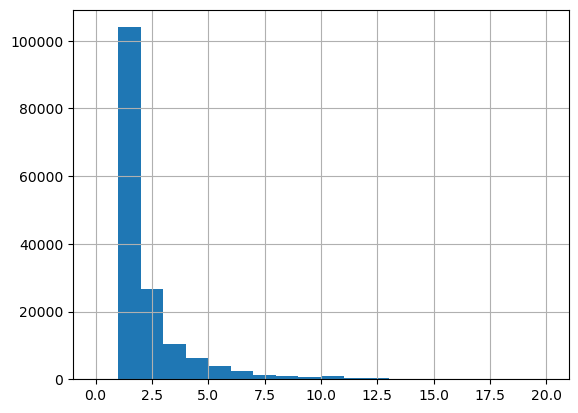

In [32]:
in_order['count'].hist(range=(0, 20), bins = 20)

<AxesSubplot:xlabel='count'>

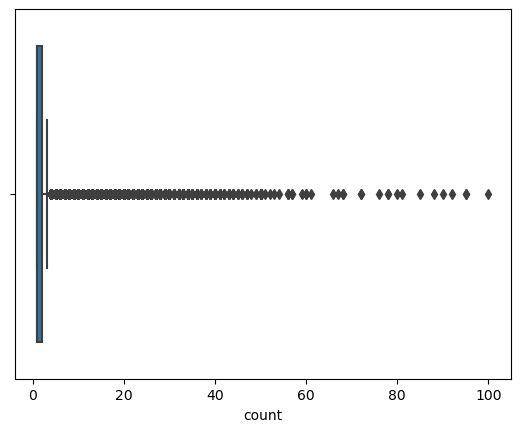

In [33]:
sns.boxplot(in_order.query('orderkey not in ["c6f08cf222f425f397a9f1beaac0e485", \
                "aac30fd1be266afae94a86bd5628a875", "59ff5833bb533928050f23c8b4ed048c"]')['count'])

In [34]:
in_order.describe()

,count,trackingid,box_num,who
count,159899.000000,159899.000000,159899.000000,159899.000000
mean,2.036429,1.066780,1.066680,1.002045
std,12.306166,0.742652,0.742543,0.051393
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,1.000000
max,4770.000000,235.000000,235.000000,5.000000


1. Предлагаю исключить из датасета заказы, которые собирали разные упаковщики их всего 15. Т.к. разные упаковщикик = несколько упаковок. Либо поменять у одной из частей заказа id. Нужно ли нам уточнять почему заказ собирается разными упаковщиками, по какому приницпу разделение?
2. Если мы будем брать в качестве свойства количество упаковок, то нужно считать по trackingid.
3. Добавила колонку с количеством товаров в заказе.

4. я предлагаю 6 моделей: для 1 - 103970 строк, 
 2 - 53470 строк, 
 3 - 31044, 
 4 - 25704, 
 5 - 19115,
 и больше 5 - 86743.
 Как обосновать выбор не знаю, что бы вы проверили, корреляцию признаков?

### Деление данных для ансамбля

Добавим столбец с количеством товаров в заказе.

In [35]:
full_data= full_data.merge(items_in_order, on='orderkey', how='left')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325623 entries, 0 to 325622
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       325623 non-null  int64  
 1   orderkey                  325623 non-null  object 
 2   selected_cartontype       325623 non-null  object 
 3   box_num                   325623 non-null  int64  
 4   recommended_cartontype    325623 non-null  object 
 5   sel_calc_cube             325623 non-null  int64  
 6   pack_volume               325623 non-null  int64  
 7   rec_calc_cube             325623 non-null  int64  
 8   goods_wght                325623 non-null  float64
 9   sku                       325623 non-null  object 
 10  who                       325623 non-null  object 
 11  trackingid                325623 non-null  object 
 12  a                         314830 non-null  float64
 13  b                         314830 non-null  f

In [36]:
full_data.head(20)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price,count
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
5,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
6,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
7,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
8,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41
9,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,0,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0,NaN,37.7,41


Удалим из data_full заказы с количеством товаров больше 100.

In [37]:
full_data = full_data.query('count <= 100')
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
whs,320046.0,1.389972,2.109017,0.0,0.000,0.0,3.0,7.0
box_num,320046.0,1.149544,0.871478,1.0,1.000,1.0,1.0,39.0
sel_calc_cube,320046.0,11383.367510,14000.572923,0.0,3449.000,8436.0,15579.0,108000.0
pack_volume,320046.0,5460.176606,28819.029889,0.0,500.000,1175.0,3146.0,1815450.0
rec_calc_cube,320046.0,16705.345400,24214.611810,0.0,3449.000,8525.0,18000.0,108000.0
goods_wght,320046.0,1.151138,4.123552,0.0,0.114,0.3,0.8,153.7
a,309253.0,17.995020,16.668187,0.0,8.800,14.0,21.5,257.0
b,309253.0,11.420661,9.855923,0.0,4.700,8.6,16.0,240.0
c,309253.0,14.371156,10.625969,0.0,7.000,11.0,19.0,200.0
selected_carton_price,282659.0,7.767469,6.852454,1.1,2.300,4.4,10.7,37.7


Удалим заказы, которые собирали разные упаковщики.

In [38]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320046 entries, 0 to 325622
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       320046 non-null  int64  
 1   orderkey                  320046 non-null  object 
 2   selected_cartontype       320046 non-null  object 
 3   box_num                   320046 non-null  int64  
 4   recommended_cartontype    320046 non-null  object 
 5   sel_calc_cube             320046 non-null  int64  
 6   pack_volume               320046 non-null  int64  
 7   rec_calc_cube             320046 non-null  int64  
 8   goods_wght                320046 non-null  float64
 9   sku                       320046 non-null  object 
 10  who                       320046 non-null  object 
 11  trackingid                320046 non-null  object 
 12  a                         309253 non-null  float64
 13  b                         309253 non-null  f

In [39]:
full_data = full_data.query('orderkey not in @diff_who')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319985 entries, 0 to 325622
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       319985 non-null  int64  
 1   orderkey                  319985 non-null  object 
 2   selected_cartontype       319985 non-null  object 
 3   box_num                   319985 non-null  int64  
 4   recommended_cartontype    319985 non-null  object 
 5   sel_calc_cube             319985 non-null  int64  
 6   pack_volume               319985 non-null  int64  
 7   rec_calc_cube             319985 non-null  int64  
 8   goods_wght                319985 non-null  float64
 9   sku                       319985 non-null  object 
 10  who                       319985 non-null  object 
 11  trackingid                319985 non-null  object 
 12  a                         309192 non-null  float64
 13  b                         309192 non-null  f

#### Добавим карготипы

Из списка карготипов выбрали для создания признаков:
1. 'возрастное ограничение на получение товара' - 20
2. 'интим товар' - 910
3. 'керамика/стекло/камень/фарфор' - 315
4. 'не требует упаковки' - 340
5. 'хрупкое' - 310
6. 'упаковка в пленку' - 360
7. 'цифровой товар' - 210
8. 'многоместный товар' - 303

In [40]:
necessary_cargotypes = [20, 910, 315, 340, 310, 360, 210, 303]

In [41]:
filtred_sku_cargotypes = sku_cargotypes.query('cargotype in @necessary_cargotypes')
filtred_sku_cargotypes.head()

,sku,cargotype
660,5590dfd2880c485171fb76939f07b66a,310
667,660dab0d5185085c1ddf886c9bc60d5b,310
674,ae74b61d6ec2694f14efaf2a1711a9d0,310
694,5bfd2ab1304b483dac4f9007a62d829f,310
701,aab37d262478a1a8d1439ed87a24a039,310


In [42]:
unique_data_fom_data = full_data['sku'].unique()
unique_data_fom_data

array(['af49bf330e2cf16e44f0be1bdfe337bd',
       '6287a74b664fd8ad4ed5c541b399a82b',
       'ef468fa349bb8f058aa5dcd76bda60b2', ...,
       'ba0b176dc645058663de285b479163b3',
       '0940ce4ed3c65c5713a169bdf824dfcc',
       '74ec431f87644bfed9baca351fffcdee'], dtype=object)

In [43]:
filtred_sku_cargotypes = filtred_sku_cargotypes.query('sku in @unique_data_fom_data')
filtred_sku_cargotypes['cargotype2'] = filtred_sku_cargotypes['cargotype']
filtred_sku_cargotypes.head()

,sku,cargotype,cargotype2
18785,1a12dac768e0844eb59e438b6e1af6fb,360,360
33507,65ad4902e42d576c63e8239dfb76a3ec,310,310
41813,348019ceae99a60d47e06b68d065ada9,310,310
57236,6374936010d5f23ae8c8e3f6e9bca9fe,360,360
71982,bd197f673800282f9c83a39f05734f95,340,340


In [44]:
df_pivot = filtred_sku_cargotypes.pivot_table(index='sku', columns='cargotype', values='cargotype2', aggfunc = 'count').add_prefix('cargotype_')
df_pivot

cargotype,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910
sku,,,,,,,,
000198cfae123aef536f2fcf0b104049,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0003da69535758c817b78b64da05aae0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
000791ac4c19d3c9b0ff2c5b37eabfad,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
000877cac4fc37142655b5885527c002,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
000939e43290d19ee64e019ce3918164,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
fff2905f8f19df6aa50469d436b31b9f,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
fff7ea6d05adee2f04ffb282425a722c,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
fff8250d9b792be8fb02568a140d2760,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [45]:
full_data = full_data.merge(df_pivot, on='sku', how='left')
full_data.sample(5)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price,count,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910
11765,0,1ef7ada303b1b9671255ffdfe2fd4ea3,YMF,1,YMC,13125,2882,9000,1.090,6c7bad48f6d8cc17be550ff6c5d1ad06,851ec0293a18c641e76acc22abed8d3f,7e7a74b0c5ee846f416ebf0d16e32c17,13.9,14.3,14.5,10.7,7.8,3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
55881,0,a8f3cba29c5ffb814940b51bc92b2a5a,MYC,1,YMC,8436,2448,9000,0.507,7b50bf0f3a87d952abea488132e3a8c1,a0e88cbb8e2a690c93ecf499e556f2cd,bda2733beab676560c9a7bbd201898e3,8.0,25.5,12.0,3.6,7.8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103628,0,da78382149242f942c8b7ab1cc257ba4,YMW,1,YMF,18000,1255,13125,1.056,1b690c6eadbaf1143d10ca901dd8d095,ee8a7d79d7e0173e0e429d40b4c5182e,713139088b73d377700866cda418aa57,9.6,21.8,6.0,13.9,10.7,10,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
308328,7,ad545fce1c8216d171ede0ab97955bae,YMG,1,YMB,18270,1020,32722,0.090,0d5a4e828e3e491a8169c7d038c056b9,d087040c2e3ffb8ca8a2980504b1f80b,5be799dfbc44c0dd1f9f85786f3aa399,20.0,3.0,17.0,17.5,NaN,15,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
188573,0,a50f876224af82713efc93ca4851add3,MYB,1,YMA,3449,1020,3705,0.200,c27a91b5babf15f096b9144fbcf39094,b217f95328ef08f9daad2d24876ad827,bc258eecff677b543d4f8cfed05b268e,17.0,6.0,10.0,2.3,4.4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319985 entries, 0 to 319984
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       319985 non-null  int64  
 1   orderkey                  319985 non-null  object 
 2   selected_cartontype       319985 non-null  object 
 3   box_num                   319985 non-null  int64  
 4   recommended_cartontype    319985 non-null  object 
 5   sel_calc_cube             319985 non-null  int64  
 6   pack_volume               319985 non-null  int64  
 7   rec_calc_cube             319985 non-null  int64  
 8   goods_wght                319985 non-null  float64
 9   sku                       319985 non-null  object 
 10  who                       319985 non-null  object 
 11  trackingid                319985 non-null  object 
 12  a                         309192 non-null  float64
 13  b                         309192 non-null  f

In [47]:
full_data.columns

Index(['whs', 'orderkey', 'selected_cartontype', 'box_num',
       'recommended_cartontype', 'sel_calc_cube', 'pack_volume',
       'rec_calc_cube', 'goods_wght', 'sku', 'who', 'trackingid', 'a', 'b',
       'c', 'selected_carton_price', 'recommended_carton_price', 'count',
       'cargotype_20', 'cargotype_210', 'cargotype_303', 'cargotype_310',
       'cargotype_315', 'cargotype_340', 'cargotype_360', 'cargotype_910'],
      dtype='object')

In [48]:
for column in ['cargotype_20', 'cargotype_210', 'cargotype_303', 'cargotype_310',
       'cargotype_315', 'cargotype_340', 'cargotype_360', 'cargotype_910']:
    full_data[column] = full_data[column].fillna(0)
full_data.sample(5)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price,count,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910
48729,0,488523a7e642b4282e9d4e1640071602,MYC,1,MYC,8436,2187,8436,0.558,b5ad4c2247f49c3ad91698352850b94d,3b03332360fe50db6ce311bbeb983e81,10bc9fadb0ff494ac131d354278dc8d1,22.7,4.1,23.5,3.6,3.6,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16490,0,54623e5bebe07c71af5503e451ca3b26,YMG,1,YMF,26820,1116,13125,1.000,1135a244dc5f3a0132042d140d212375,9aae9cf55744157fad6f48ba3c5a618a,2b2cbe529fc584a7f0fe00afcb023c4e,7.4,14.1,10.7,17.5,10.7,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22694,0,63a6d422d1ef69cfe6f175ca6fcd9720,STRETCH,2,STRETCH,0,7829,0,1.527,ca2bec3450819092372c68b72924b708,7e20d57e102998782761847a9aef9346,42511aa70e77ce1e14ce2c6a3bf3a3ba,36.5,5.5,39.0,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242434,3,b2ebcbe4a3cd5a4de7786ad6b0bc7681,YMG,1,YML,26153,750,104586,0.010,26e9be3673554e691ebb82ec05a4c6b9,9d095976d3796785d7fb5eb8bf6886b6,0d0f95523f30cc78066d5bc6ad98ec2f,15.0,5.0,10.0,17.5,37.7,76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144500,0,3022d87cea4fbb4a0aef1b5a1ead83f5,MYC,1,MYC,8436,409,8436,0.036,af4f539bb102f2632ef40a123f5c8350,65e5ac078e12ae60c46e12be4e8b720c,069987c8a2944b81f3664cb7062beccd,11.0,3.8,9.8,3.6,3.6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Добавим таргет

In [49]:
# Если выбранный и предложенный типы упаковки совпадают, берем их значение
# Если нет, то самую дешевую
def target(data):
    def price(row):
        if row['selected_cartontype'] == row['recommended_cartontype']:
            val = row['selected_cartontype']
        elif row['recommended_carton_price'] < row['selected_carton_price']:
            val = row['recommended_cartontype']
        elif row['selected_carton_price'] < row['recommended_carton_price']:
            val = row['selected_cartontype']
        else:
            val = 'no_price'
        return val
# Если какой-то цены нет, то берем наименьшую
    def size(row):
        if row['rec_calc_cube'] < row['sel_calc_cube']:
            val = row['recommended_cartontype']
        elif row['sel_calc_cube'] < row['rec_calc_cube']:
            val = row['selected_cartontype']
        else :
            val = 'error'
        return val

    data['target'] = data.apply(price, axis=1)
    data.loc[data['target'] == 'no_price', 'target'] = data.apply(size, axis=1)
    return data

In [50]:
full_data = target(full_data)

In [51]:
full_data.sample(5)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price,count,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910,target
38945,0,f001943798b75c5039a4a9b8cb52165b,MYC,1,YMA,8436,1260,3705,0.400,4923e95a2c1c0428d78fd0c5c6ee7b1e,a13b76c215e388cef6682d2fd5592eba,a5ab5e32b6137e54b7bf901bd0c50368,12.0,7.0,15.0,3.6,4.4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,MYC
194657,0,75a9c3b12abb2e57baba4edc92c488ea,MYC,1,YMA,8436,1026,3705,0.230,d36ed331975523c354337f57e9f40524,8015b6484762348039807810f8f6b98a,bd4a64d1574924376fb768f80997e281,19.0,6.0,9.0,3.6,4.4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYC
159600,0,bddb6792b45d14458b943a377f3a47a9,MYC,1,MYB,8436,1517,3449,0.693,944258f4622c48640669acd4f14fb984,ced6025e0ec05740a00a248724c15d09,b1af62ebf025f784b6f7913d6d85149b,18.5,4.0,20.5,3.6,2.3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYB
180462,0,a6a84027592471a588b51eb3e72bedcc,MYA,1,MYA,998,68,998,0.029,ab945cd4dd5c3a87051ad78a65289907,402b468a3eccccd8ce9ea77961ada7ff,2575c1f1613a3df7fbc1a1610822ef19,17.0,2.0,2.0,1.1,1.1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYA
252434,3,f0397aee3c947b947ea8673c8e7c8ac0,YMF,1,MYC,13500,2273,8436,0.504,8741c220b171cff243d04fcf84c5ade8,2740266f3485aa5002f1778ff0bcbe35,ee9e54ceba52f06fa2a3aac4d9a8c895,18.5,5.1,24.1,10.7,3.6,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,MYC


In [52]:
orders_one_item = full_data.query('count == 1')
orders_one_item.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
whs,103970.0,NaN,NaN,NaN,1.456478,2.050942,0.0,0.0,0.0,3.0,7.0
orderkey,103970,103970,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selected_cartontype,103970,16,MYB,32212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
box_num,103970.0,NaN,NaN,NaN,1.011744,0.159067,1.0,1.0,1.0,1.0,20.0
recommended_cartontype,103970,22,YMA,21829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sel_calc_cube,103970.0,NaN,NaN,NaN,5142.867539,5719.311446,0.0,998.0,3449.0,8436.0,104586.0
pack_volume,103970.0,NaN,NaN,NaN,10794.260912,47427.772426,0.0,513.0,1575.0,5808.0,1815450.0
rec_calc_cube,103970.0,NaN,NaN,NaN,8696.92997,15142.5603,0.0,1447.0,3705.0,9000.0,108000.0
goods_wght,103970.0,NaN,NaN,NaN,1.846998,5.431474,0.0,0.13,0.378,1.063,153.7
sku,103970,53316,bd96ee8a131321f5c6d99aba4d778eed,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
orders_many_items = full_data.query('count > 1')
orders_many_items.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
whs,216015.0,NaN,NaN,NaN,1.35817,2.135806,0.0,0.0,0.0,3.0,7.0
orderkey,216015,55911,019902864522eae8aeec192b9e8e1803,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selected_cartontype,216015,17,MYC,28418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
box_num,216015.0,NaN,NaN,NaN,1.215869,1.048547,1.0,1.0,1.0,1.0,39.0
recommended_cartontype,216015,22,MYC,28248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sel_calc_cube,216015.0,NaN,NaN,NaN,14387.767331,15712.571564,0.0,3705.0,9000.0,18000.0,108000.0
pack_volume,216015.0,NaN,NaN,NaN,2893.130917,11294.745474,0.0,487.0,1071.0,2400.0,804960.0
rec_calc_cube,216015.0,NaN,NaN,NaN,20561.551128,26694.484357,0.0,3705.0,9000.0,26277.0,108000.0
goods_wght,216015.0,NaN,NaN,NaN,0.81625,3.263073,0.0,0.11,0.289,0.64,135.0
sku,216015,49984,d1c5c59bf0fbf36adacf3ccfd06cc2d5,2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='count'>

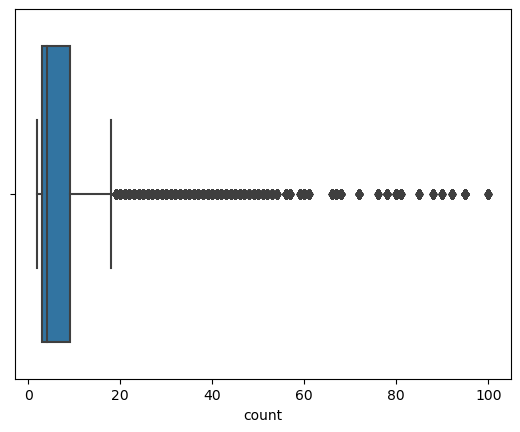

In [54]:
sns.boxplot(orders_many_items['count'])

<AxesSubplot:>

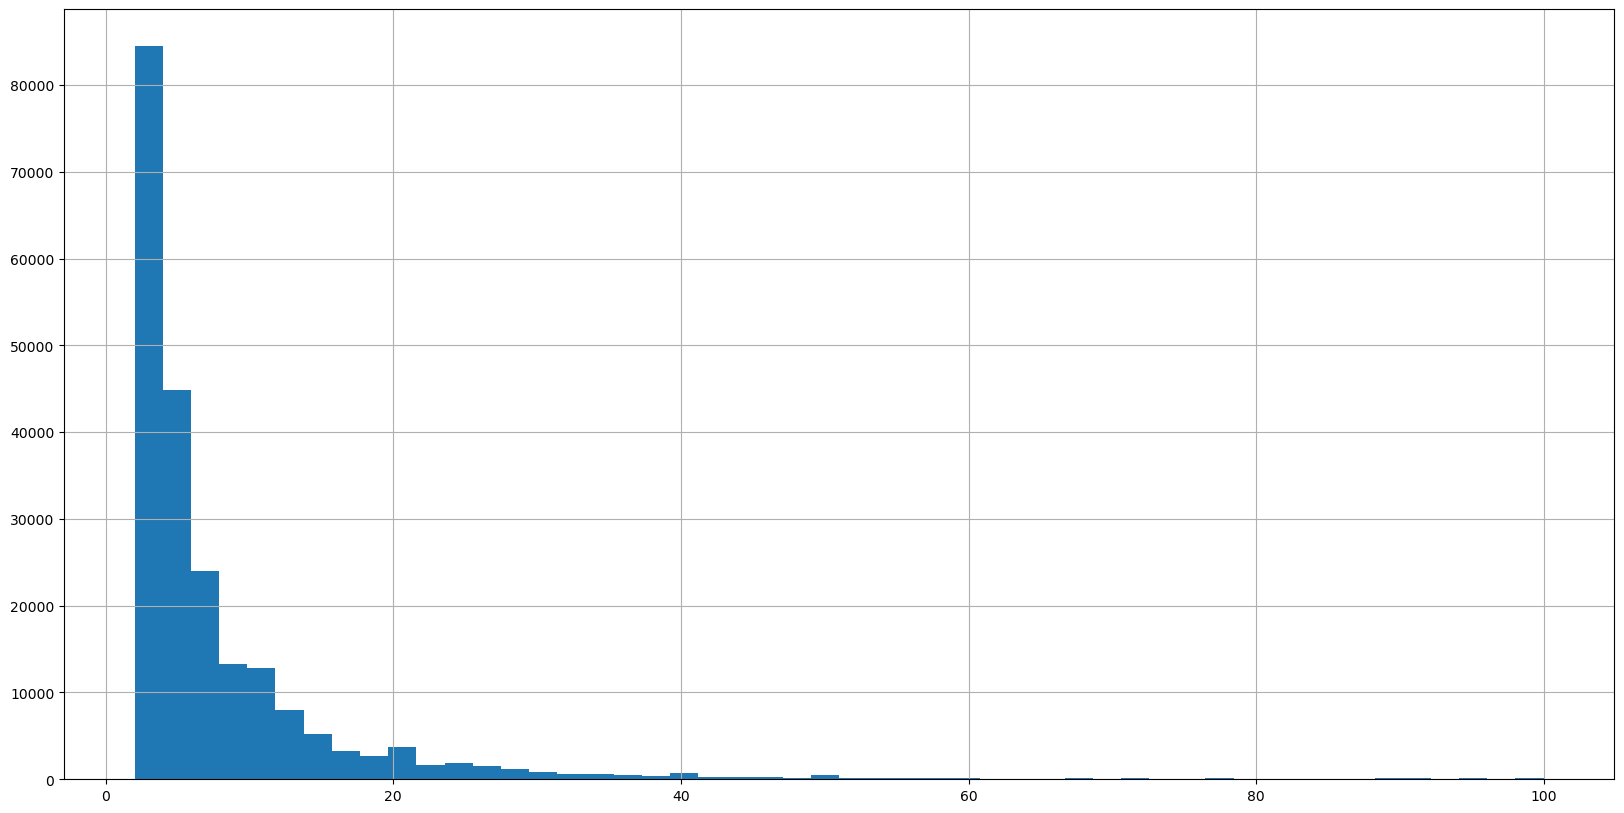

In [55]:
orders_many_items['count'].hist(range=(2, 100), bins = 50, figsize=(20,10))